In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Text(0, 0.5, 'Frequency')

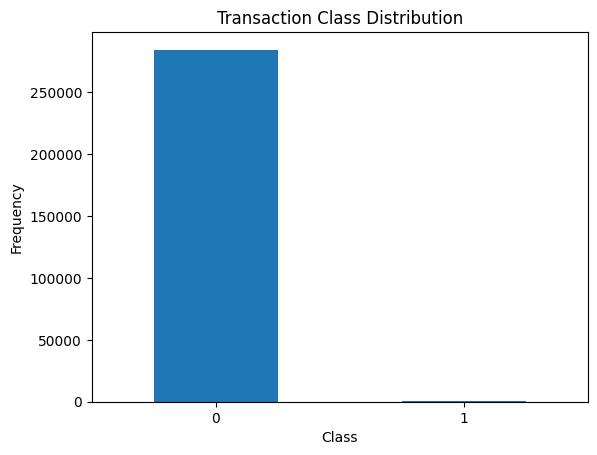

In [ ]:
count_class=pd.value_counts(df['Class'],sort=True)
count_class.plot(kind='bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [ ]:
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


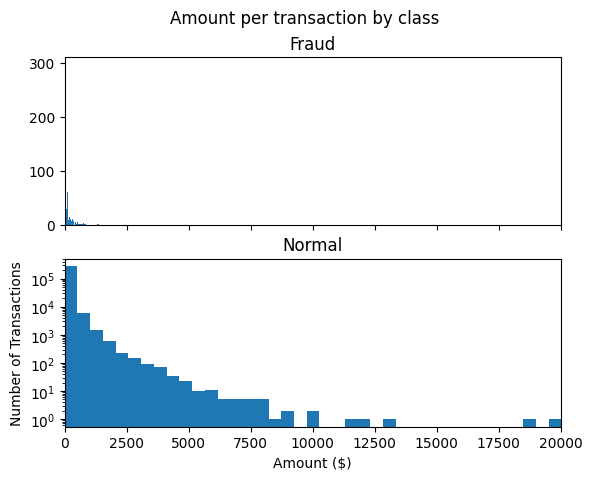

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

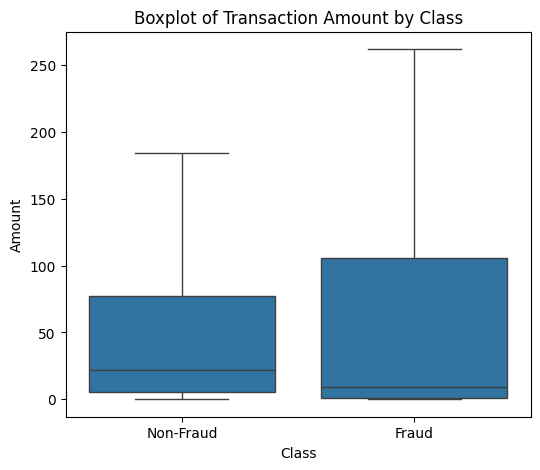

In [ ]:
plt.figure(figsize=(6,5))

sns.boxplot(x="Class", y="Amount", data=df, showfliers=False)

plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.title("Boxplot of Transaction Amount by Class")
plt.show()


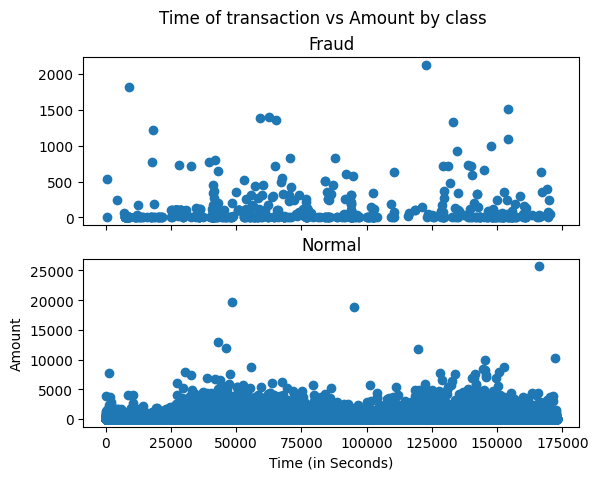

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

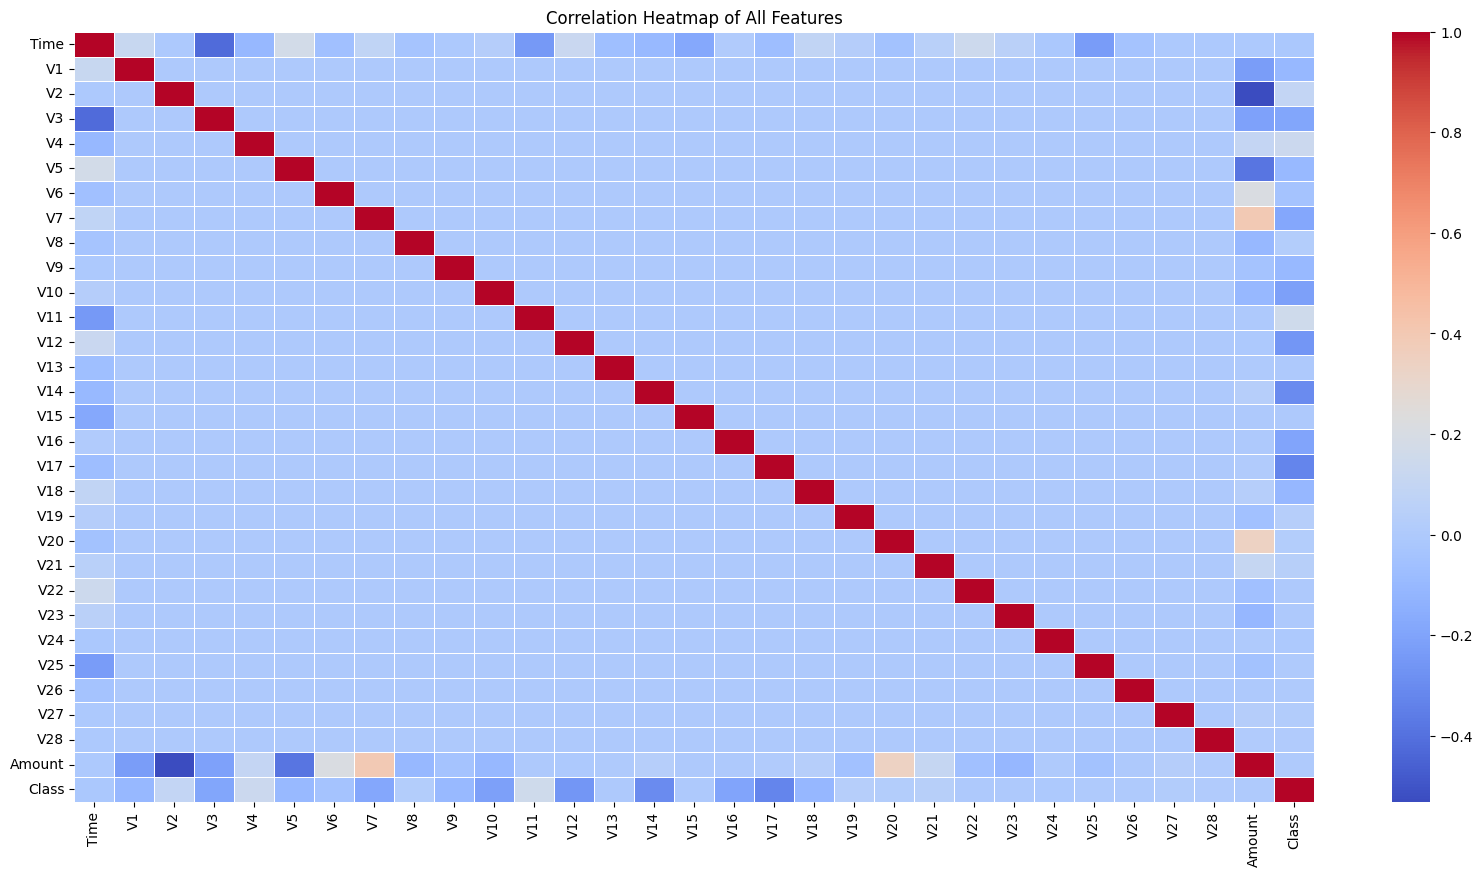

In [ ]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.show()

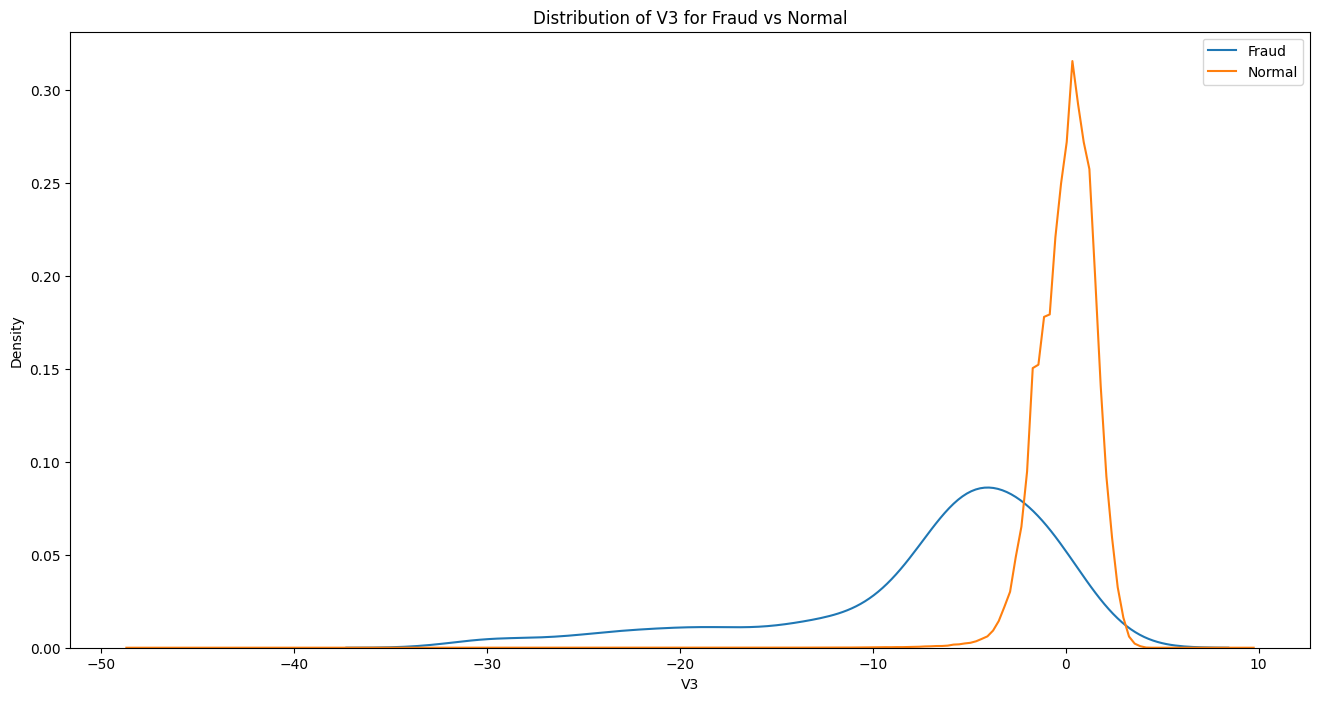

In [ ]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

plt.figure(figsize=(16,8))
sns.kdeplot(fraud['V3'], label="Fraud")
sns.kdeplot(normal['V3'], label="Normal")
plt.title("Distribution of V3 for Fraud vs Normal")
plt.legend()
plt.show()

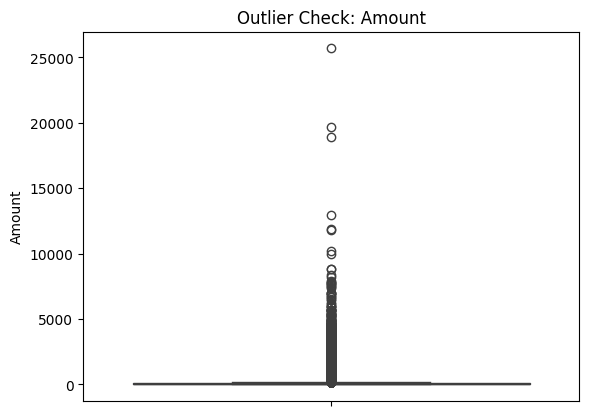

In [ ]:
sns.boxplot(df['Amount'])
plt.title("Outlier Check: Amount")
plt.show()

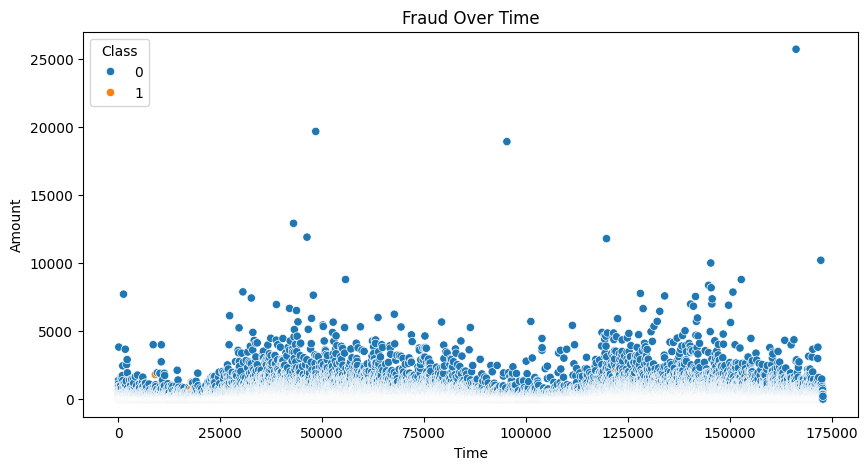

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df)
plt.title("Fraud Over Time")
plt.show()

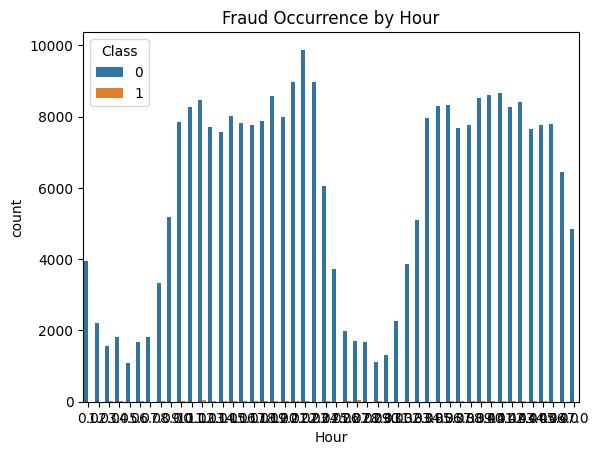

In [ ]:
df['Hour'] = df['Time'] // 3600
sns.countplot(x='Hour', hue='Class', data=df)
plt.title("Fraud Occurrence by Hour")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
df["LogAmount"] = np.log1p(df["Amount"])

In [ ]:
df["Hour"] = (df["Time"] // 3600) % 24

In [ ]:
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)

In [ ]:
#best split vs random split

In [ ]:
#Split criteria -decision trees -random splits #log of n base 2 -max depth

In [ ]:
pca_cols = [f"V{i}" for i in range(1,29)]
use_cols = pca_cols + ["LogAmount", "Hour_sin", "Hour_cos"]

In [ ]:
X_all = df[use_cols].copy()
y_all = df["Class"].copy()

In [ ]:
split = int(0.8 * len(df))

X_train = X_all.iloc[:split].copy()
y_train = y_all.iloc[:split].copy()

X_test = X_all.iloc[split:].copy()
y_test = y_all.iloc[split:].copy()


In [ ]:
scaler = StandardScaler()
to_scale = ["LogAmount", "Hour_sin", "Hour_cos"]


X_train[to_scale] = scaler.fit_transform(X_train[to_scale])


X_val[to_scale]   = scaler.transform(X_val[to_scale])
X_test[to_scale]  = scaler.transform(X_test[to_scale])


In [ ]:
X_train_normal = X_train[y_train == 0]

iso = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=0.002,
    random_state=42,
    n_jobs=-1
)

iso.fit(X_train_normal)


IsolationForest(contamination=0.002, n_estimators=200, n_jobs=-1,
                random_state=42)

In [ ]:
scores_test = -iso.decision_function(X_test)

In [ ]:
y_pred_default = (iso.predict(X_test) == -1).astype(int)

In [ ]:
from sklearn.metrics import average_precision_score, classification_report, confusion_matrix
print("PR-AUC:", average_precision_score(y_test, scores_test))
print(classification_report(y_test, y_pred_default))
print(confusion_matrix(y_test, y_pred_default))


PR-AUC: 0.03924205049750745
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.02      0.03      0.02        75

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962

[[56797    90]
 [   73     2]]


In [ ]:
p = 0.002
threshold = np.percentile(scores_test, 100 * (1 - p))
y_pred_tuned = (scores_test >= threshold).astype(int)
print("Tuned threshold classification report:")
print(classification_report(y_test, y_pred_tuned))

Tuned threshold classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.02      0.03      0.02        75

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Step 1: Features & target
X = df.drop("Class", axis=1)
y = df["Class"]

# Step 2: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Handle imbalance (fraud very less)
scale = (len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Step 4: Train XGBoost
model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# Step 6: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

target_precision = 0.90

try:

    threshold_indices = np.where(precision >= target_precision)[0]

    if threshold_indices.size > 0:

        optimal_index = threshold_indices[0]
        new_threshold = thresholds[optimal_index]
    else:
        print("Warning: Model could not achieve target precision. Using a default threshold of 0.5.")
        new_threshold = 0.5
except NameError:
    print("Error: Required variables (precision, recall, thresholds) not found. Please run the model training and precision_recall_curve calculation first.")
    new_threshold = 0.5


# --- 3. Apply and Evaluate New Threshold ---
y_pred_tuned = (y_pred_prob >= new_threshold).astype(int)

print(f"\n--- Evaluation Tuned for Precision ({target_precision*100:.0f}%) ---")
print(f"New Threshold Selected: {new_threshold:.6f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


--- Evaluation Tuned for Precision (90%) ---
New Threshold Selected: 0.961204
Confusion Matrix:
 [[56856     8]
 [   20    78]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

